In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import yfinance as yf
import datetime
import matplotlib.pyplot as plt # for plots
import seaborn as sns
%matplotlib inline

In [3]:
#fetching data from S&P 500 index using yfinance api
sp500_df = yf.download('^GSPC', start = datetime.datetime(1994, 1, 1), end = datetime.datetime(2024, 6, 30)) #from 1st January 1994 to 30th June 2024

[*********************100%%**********************]  1 of 1 completed


In [4]:
#performing some preliminary data checks
sp500_df.dtypes #checking the data types of each feature
sp500_df.isna().sum(); #calculate 'NaN' counts for each column

Text(0, 0.5, 'Closing Price in USD')

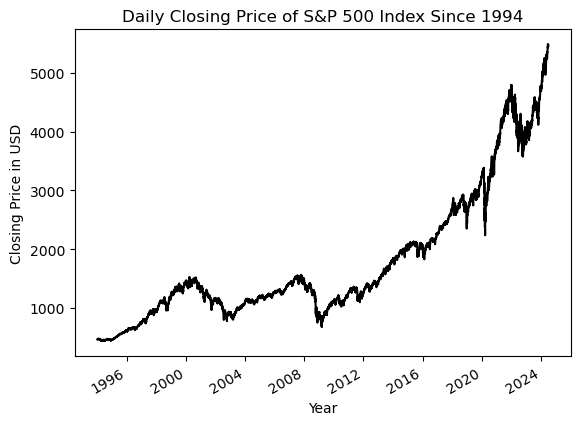

In [9]:
#plotting s&p index closing price over years
ax = sp500_df['Adj Close'].plot(color='black')
ax.set(xlabel='Date',ylabel='S&P 500')
ax.set_title('Daily Closing Price of S&P 500 Index Since 1994')
ax.set_xlabel('Year')
ax.set_ylabel('Closing Price in USD')

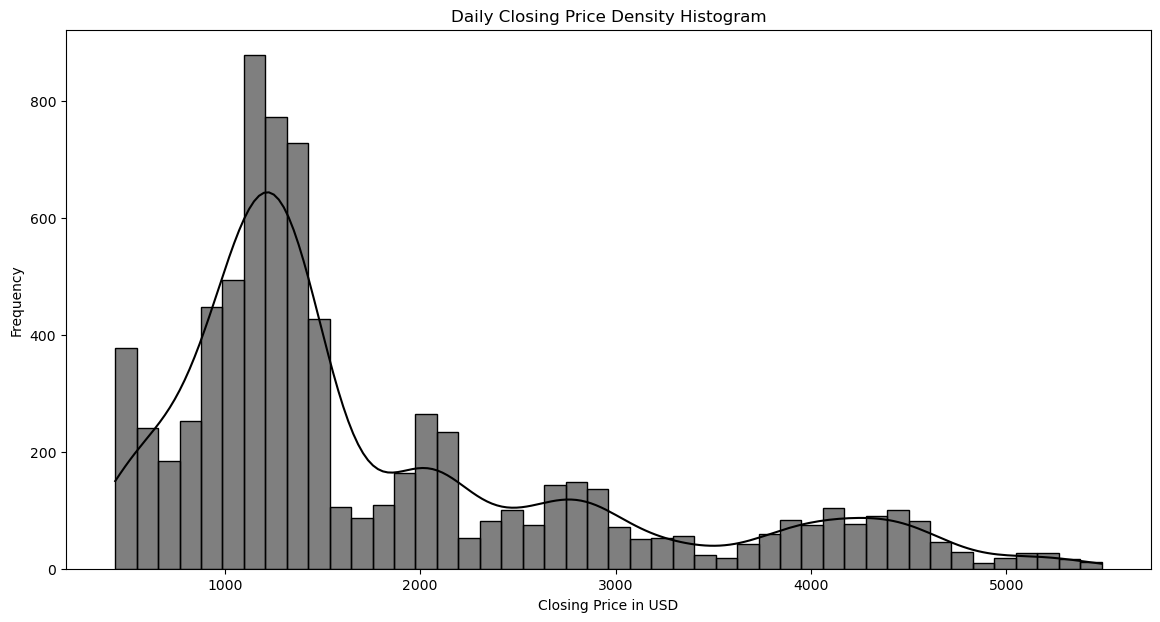

In [11]:
#density plot of the daily closing price 
plt.figure(figsize=(14, 7))
sns.histplot(sp500_df['Adj Close'], kde=True, color='black')
plt.title('Daily Closing Price Density Histogram')
plt.xlabel('Closing Price in USD')
plt.ylabel('Frequency')
plt.show()

In [23]:
#extracting the stock information of the top 5% of sandp 500 index.
sp500_top_25_tickers = [ "AAPL", "MSFT", "GOOGL", "GOOG", "AMZN", "META", "TSLA", "BRK.B", "NVDA", "JNJ", "V", "JPM",
    "PG", "UNH", "HD", "PYPL", "MA", "NSRGY", "TSM", "ADBE", "WMT", "RHHBY", "PFE", "CMCSA", "NFLX"]
top25_df = pd.DataFrame()
for stock in sp500_top_25_tickers:
    df25 = yf.download(stock, start = datetime.datetime(1994, 1, 1), end = datetime.datetime(2024, 6, 30))
    top25_df[stock] = df25['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[***

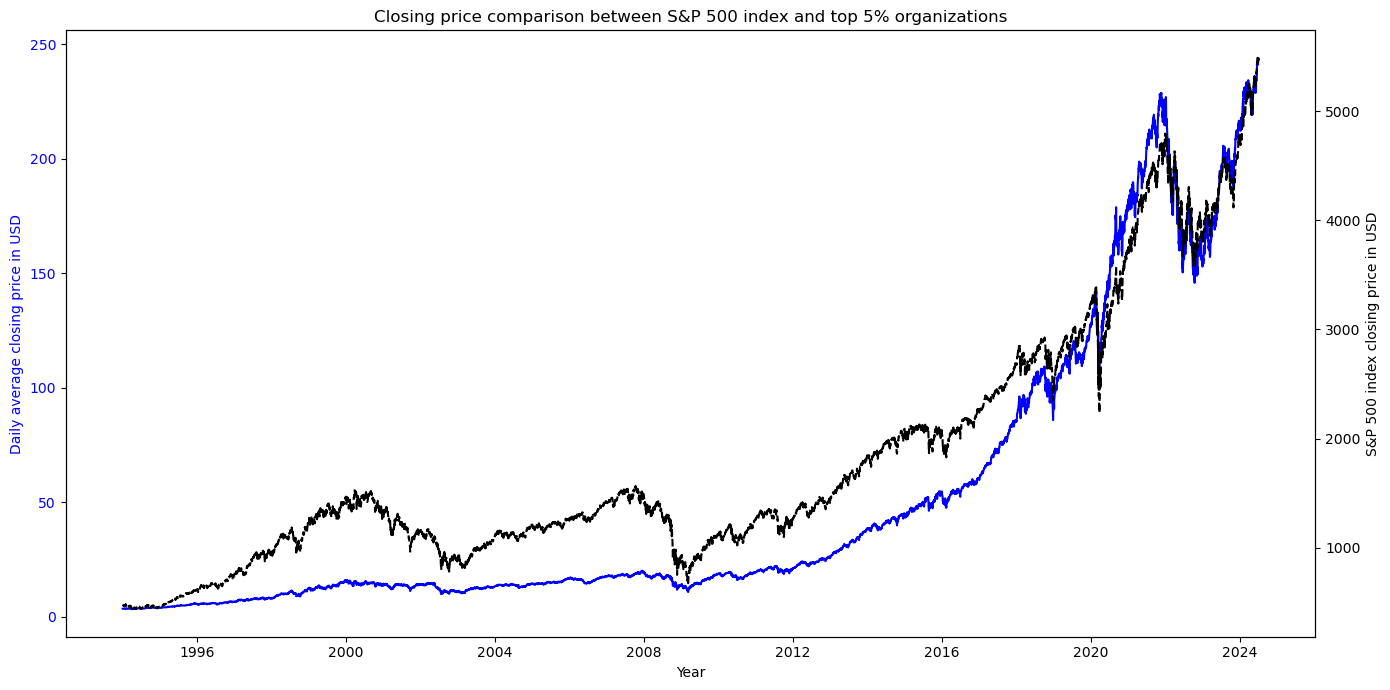

In [24]:
#calculating the average of the indexes
top25_df['average'] = top25_df.mean(axis = 1)
top25_df['average'];
#plotting a comparison graph between the s&p500 index and top 5% organizations
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(top25_df.index, top25_df['average'], label='Average of All Companies', color='b')
ax1.set_xlabel('Year')
ax1.set_ylabel('Daily average closing price in USD', color='b')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df['Adj Close'], label='S&P 500 Index', color='black', linestyle='--')
ax2.set_ylabel('S&P 500 index closing price in USD', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Closing price comparison between S&P 500 index and top 5% organizations')
fig.tight_layout()
plt.show()

In [25]:
#trying to understand the closeness of the considered trendlines
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(sp500_df['Adj Close'], top25_df['average'])
rmse = np.sqrt(mean_squared_error(sp500_df['Adj Close'], top25_df['average']))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 1747.4823503423975
Root Mean Squared Error: 2052.7150162621915


In [26]:
#extracting the stock information of the bottom 5% of s and p 500 index.
sp500_last_25_tickers = ["CMI","AEP","PSA","ICE","SO","HCA","PLD","FISV","EL","PRU","CCI","MET","PNC","COST",
                         "LHX","BDX","AON","SBUX","GS","DHR","MMM","T","BKNG","CVX","NKE"]
last25_df = pd.DataFrame()
for stock in sp500_last_25_tickers:
    df25 = yf.download(stock, start = datetime.datetime(1994, 1, 1), end = datetime.datetime(2024, 6, 30))
    last25_df[stock] = df25['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

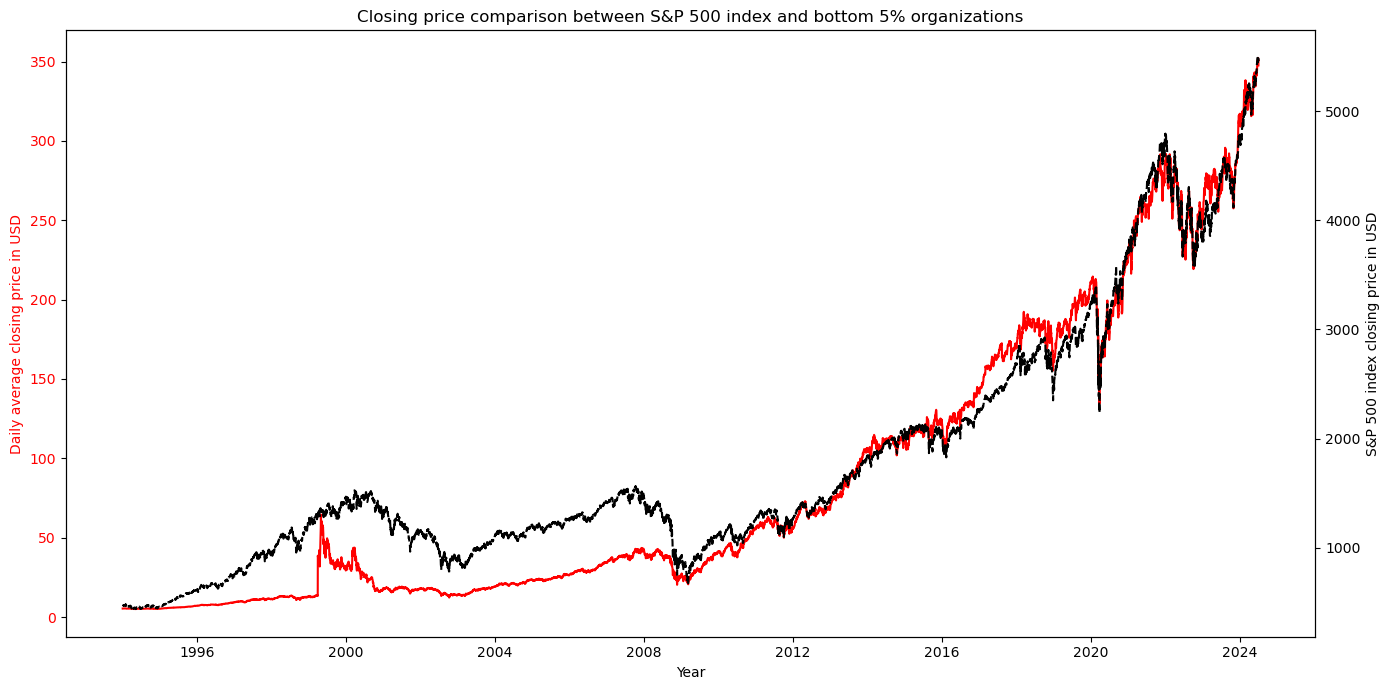

In [27]:
#calculating the average stock closing prices 
last25_df['average'] = last25_df.mean(axis = 1)
last25_df['average'];

#plotting the dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

ax1.plot(last25_df.index, last25_df['average'], label='Average of All Companies', color='r')
ax1.set_xlabel('Year')
ax1.set_ylabel('Daily average closing price in USD', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df['Adj Close'], label='S&P 500 Index', color='black', linestyle='--')
ax2.set_ylabel('S&P 500 index closing price in USD', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('Closing price comparison between S&P 500 index and bottom 5% organizations')
fig.tight_layout()
plt.show()

In [29]:
#trying to understand the closeness of the considered trendlines
mae = mean_absolute_error(sp500_df['Adj Close'], last25_df['average'])
rmse = np.sqrt(mean_squared_error(sp500_df['Adj Close'], last25_df['average']))
print('Mean Absolute Error:', mae)
print('Root Mean Squared Error:', rmse)

Mean Absolute Error: 1711.8727943529677
Root Mean Squared Error: 2008.5839025597636
